# Object References and Identity

## Introduction

Remember how variables refer to values, and how all values in Python are objects? It's possible for two or more variables to refer to the same object. We can tell whether this is the case by using the **is** operator.

In [ ]:
num_1 = 1000
num_2 = 1000

Test whether *num_1* and *num_2* are equal

In [ ]:
num_1 == num_2

Test whether *num_1* and *num_2* refer to the same object

In [ ]:
num_1 is num_2

Now *num_1* and *num_2* refer to the same object and check again

In [ ]:
num_1 = num_2
num_1 is num_2

Make *num_2* refer to a different object

In [ ]:
num_2 = -89
num_1 is num_2

The first line creates an object for the value 1000 and **binds** the variable *num_1* to it. The second line creates another object for the value 1000 and binds the variable *num_2* to it. Next we use the == operator to test whether *num_1* and *num_2* refer to values that are equal, which they do. Then we use the is operator to test whether *num_1* and *num_2* refer to (are bound to) the same object, which they aren't. Next we assign *num_2* to *num_1*. This **rebinds** *num_1*, so that now it refers to the same object that *num_2* does. When we test again whether *num_1* and *num_2* refer to the same object, we see that they now do. Next we have another assignment statement, which creates an object for the value -89 and rebinds *num_2* to refer to that object. Now we see that *num_1* and *num_2* no longer refer to the same object. Assigning -89 to *num_2* did not change the object for the value 1000, which *num_1* still refers to. We cannot change the value of an integer object, because integers are immutable, but we can rebind a variable to a different object.

You can think of a variable as like a sticky note that you can stick to different objects. You can have multiple sticky notes attached (bound) to the same object, and you can take a sticky note off one object and attach it to another object, even an object of another type.

## Example Using Lists

Now let's look at an example that uses lists, which we know are mutable.

In [ ]:
num_list_1 = [2,9,7]
num_list_2 = [2,9,7]

Test whether *num_list_1* and *num_list_2* are equal

In [ ]:
num_list_1 == num_list_2

Now they refer to the same object

In [ ]:
num_list_1 = num_list_2
num_list_1 is num_list_2

Make *num_list_2* refer to a different object

In [ ]:
num_list_2 = [23,-1,19]
num_list_1 is num_list_2

This example behaves the same way as the previous example. So far, being mutable doesn't seem to make a difference. However, let's try something a little different:

*num_list_1* and *num_list_2* refer to the same object

In [ ]:
num_list_1 = [3,17,12]
num_list_2 = num_list_1
num_list_1 is num_list_2

Change the object that *num_list_1* and *num_list_2* both refer to

In [ ]:
num_list_2[0] = 99

In [ ]:
num_list_1

In [ ]:
num_list_1 is num_list_2

In this example, changing *num_list_2* does **not** result in creating a new object and rebinding *num_list_2* to that object. Instead, it mutates the existing list object, which *num_list_1* and *num_list_2* both still refer to. We can see that **there is a difference between rebinding a variable, and mutating the value that a variable refers to**.

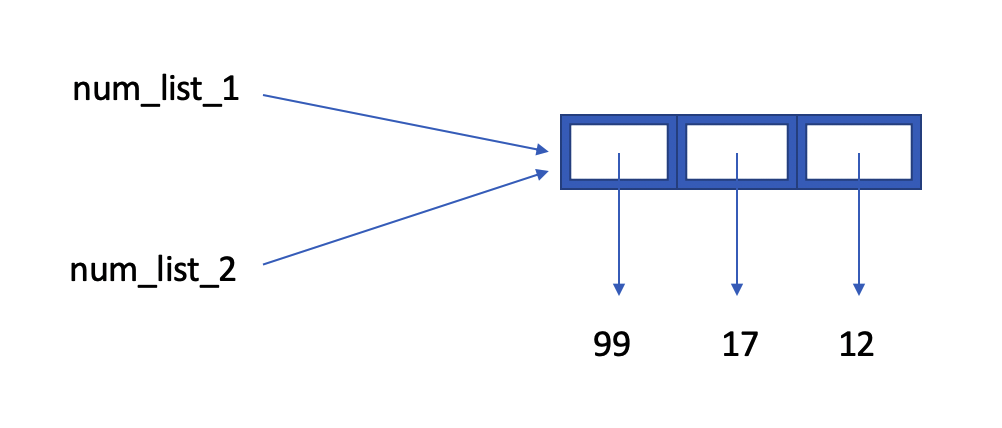

## Changing Parameters - Mutating Values

This helps explain what happens when a function "changes" one of its parameters. Let's revisit a couple of examples we've seen previously:

In [ ]:
# first example
def square_val(val):    
    val = val * val    
    print(val)

num = 8
square_val(num)
print(num)

# second example
def square_val(val):    
    val[0] = val[0] * val[0]    
    print(val)

num_list = [8]
square_val(num_list)
print(num_list)

In the first example, we pass *num* to the function and *val* gets bound to the same object as num. Then the line "val = val * val" creates a new object for the value 64, and **rebinds _val_ to that object**. At this point *num* and *val* no longer refer to the same object. This is why *num* doesn't show any change after the function call.

In the second example, we pass *num_list* to the function and *val* gets bound to the same object as *num_list*. Then the line "val[0] = val[0] * val[0]" **mutates** the list that both *num_list* and *val* refer to. This is why *num_list* shows a change after the function call.

So if you need for a function to mutate a value, then that value needs to be of a mutable type.  Note that in Python a variable doesn't have a type - it's the value it references that has a type, and that type determines whether the value is mutable or immutable.

## Shallow Copies vs. Deep Copies

We can make a copy of a list like this:

In [ ]:
original_list = [1, [1,2,3]]
copied_list = list(original_list)

copied_list now holds a copy of original_list, but it's just a **shallow copy**.

In [ ]:
original_list is copied_list

In [ ]:
original_list[0] is copied_list[0]

In [ ]:
original_list[1] is copied_list[1]

We can see that although *original_list* and *copied_list* refer to different objects, the elements of *original_list* and the elements of copied_list refer to the same objects.  If you mutate the list referenced by *original_list[1]*, and then print *copied_list*:

In [ ]:
original_list[1][0] = 99
copied_list

You'll see that copied_list shows that change as well.

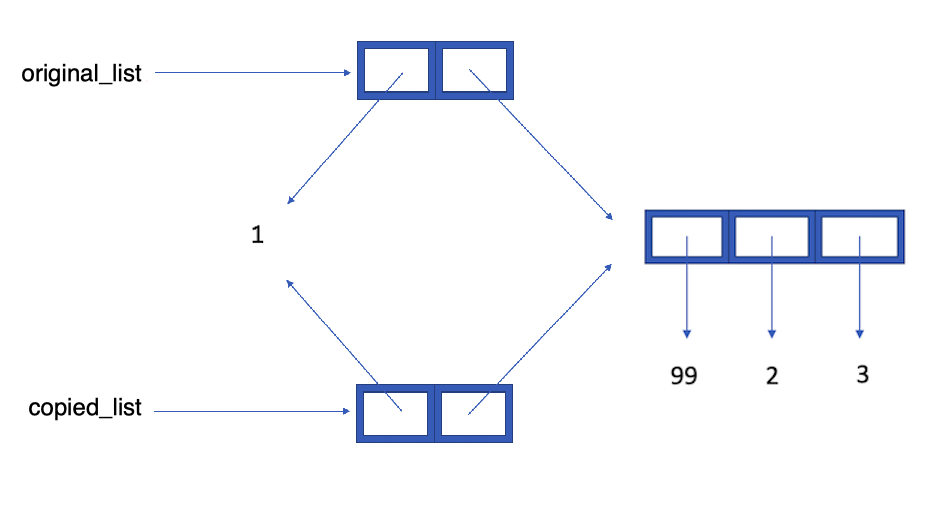

A **deep copy**, however, would be an entirely separate copy (no shared sub-elements or sub-sub-elements, etc.).  If we had made a deep copy in this example instead of a shallow copy, it would look like this:

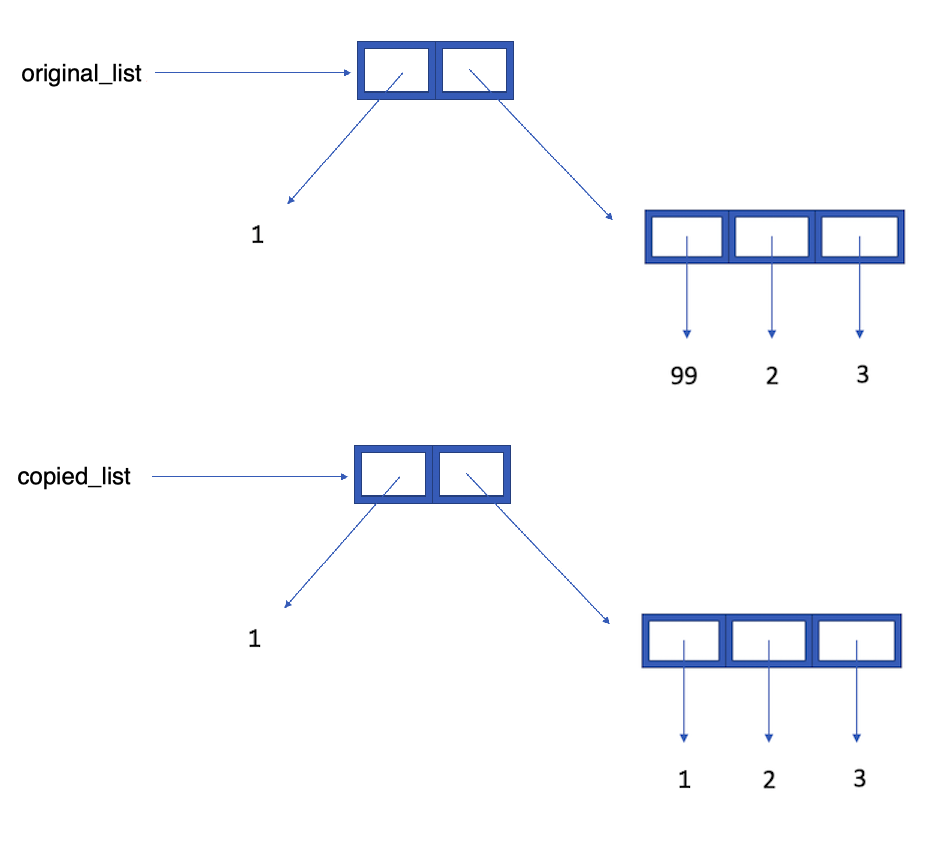

We could have achieved a deep copy by also making a copy of any sublists (or other mutable sub-elements):

In [ ]:
copied_list = list(original_list)
copied_list[1] = list(original_list[1])

There is a Python module that can be used to make deep copies, but we won't cover that here.

Continuing with our shallow copy example, if you enter the following:

In [ ]:
original_list[0] = 5
copied_list

You'll see that copied_list hasn't changed.  That's because we're not mutating the object referred to by *original_list[0]* (it's an int, and ints are immutable).  Instead, we're rebinding *original_list[0]* to a new int object.

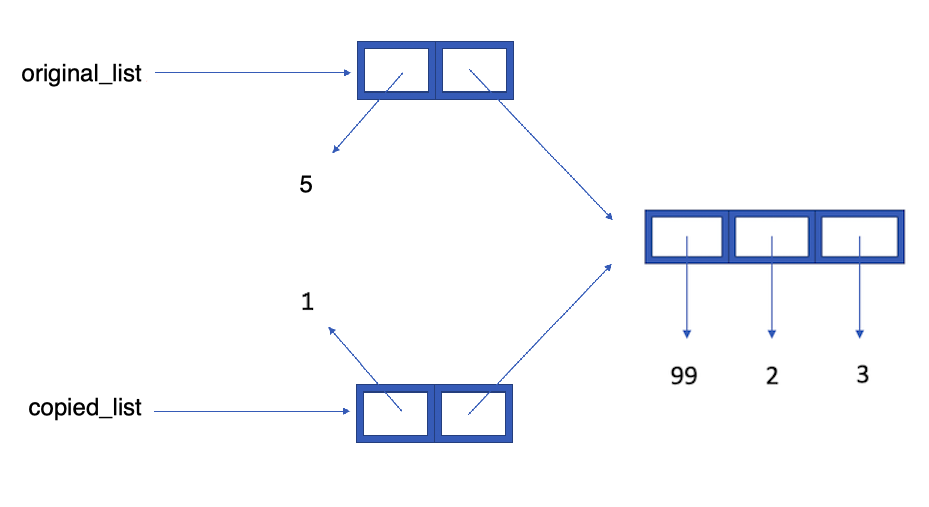

We were able to mutate the object referred to by *original_list[1]* because it's a list, and lists are mutable.  If we wanted, we could rebind *original_list[1]*, like this:

In [ ]:
original_list[1] = [2,4,6,8]

In which case *copied_list* wouldn't be affected, because we're not mutating a shared list, but instead rebinding *original_list[1]* to a new list object.

## Automatic Sharing

Sometimes Python is able to figure out that it can save memory by automatically making variables refer to the same object.|

In [ ]:
num_1 = 5
num_2 = 5
num_1 is num_2

In [ ]:
name_1 = "Betty"
name_2 = "Betty"
name_1 is name_2

This only ever happens with (equal) immutable values, so it can't affect your code's results.

You might notice that this example using 5 gives you different results than the earlier example that used 1000.  It depends too on whether you're running the code in the interactive console or running it as a script.  In the interactive console, Python keeps an array of integer objects for -5 through 256.  When you create an int in that range, you actually just get back a reference to the existing object.  So if you do that with two (or more) variables, they will then refer to the same object.  However, if you type that code as a script in and IDE and then try running it with different values, you can see that any integer values will be shared, not just from -5 to 256.  This is because when you're running a script, the Python interpreter can look through the entire script before running it, so it knows all the values that could be shared.

## Exercises

1. Is it possible to have variables be equal, but not refer to the same object? Is it possible to have variables refer to the same object, but not be equal? Explain both answers.

2. If *nums_1* and *nums_2* refer to the same **list** object, and you delete the first element of *nums_1*, then that affects *nums_2*, because they're the same list. Why is this not true if *nums_1* and *nums_2* refer to the same **tuple** object?

3. When does rebinding of a variable happen?